In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_true= pd.read_csv(r"C:\Users\tanma\OneDrive\Desktop\staragile\data files\Fake News Detection\True.csv")
df_fake=pd.read_csv(r"C:\Users\tanma\OneDrive\Desktop\staragile\data files\Fake News Detection\Fake.csv")

In [3]:
# add a column to indicate the news is real or fake
df_true['isfake']=1
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [4]:
df_true.drop(['date'],axis=1, inplace=True)

In [5]:
df_fake['isfake']=0
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
df_fake.drop(['date'],axis=1, inplace=True)

In [7]:
#conact the both real and fake news data
df= pd.concat([df_true,df_fake]).reset_index(drop=True)
df

,title,text,subject,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0


In [8]:
#drop the na values
df=df.dropna()

In [9]:
df.isfake.value_counts()

0    23481
1    21417
Name: isfake, dtype: int64

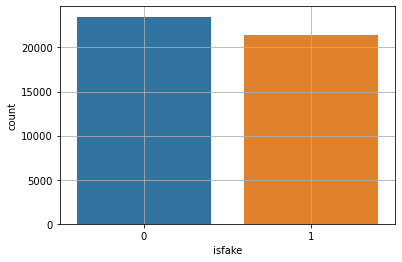

In [10]:
sns.countplot(x=df['isfake'])
plt.grid()

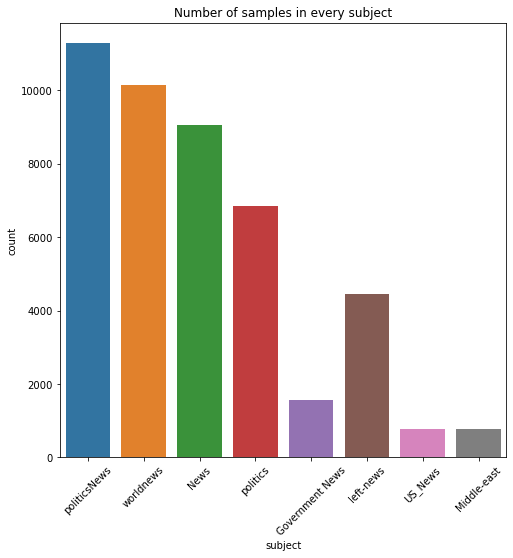

In [11]:
#plot the number of samples in subject
plt.figure(figsize=(8,8))
sns.countplot(x='subject',data= df)
plt.xticks(rotation=45)
plt.title('Number of samples in every subject')
plt.show()

In [12]:
#getting independat feature
X=df.drop(['isfake'],axis=1)
X.shape

(44898, 3)

In [13]:
# getting dependant feature
Y= df['isfake']
Y.shape

(44898,)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense

In [15]:
text= X.copy()
text.reset_index(inplace=True)

In [16]:
import nltk 
import re
from nltk.corpus import stopwords


In [17]:
# for data pre processing
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer() # that will stem the word 
corpus = [] # empty list
for i in range(0,len(text)):
    token=re.sub('[^a-zA-Z]',' ', text['title'][i]) #substitute evry word under colons
    token= token.lower() #lower case the words
    token= token.split()
    
    token=[ps.stem(word) for word in token if not word in stopwords.words('english')]
    #finding the words in stopwords stem them and append to the list
    token= ' '.join(token)
    corpus.append(token)

In [18]:
corpus

['u budget fight loom republican flip fiscal script',
 'u militari accept transgend recruit monday pentagon',
 'senior u republican senat let mr mueller job',
 'fbi russia probe help australian diplomat tip nyt',
 'trump want postal servic charg much amazon shipment',
 'white hous congress prepar talk spend immigr',
 'trump say russia probe fair timelin unclear nyt',
 'factbox trump twitter dec approv rate amazon',
 'trump twitter dec global warm',
 'alabama offici certifi senat elect jone today despit challeng cnn',
 'jone certifi u senat winner despit moor challeng',
 'new york governor question constitution feder tax overhaul',
 'factbox trump twitter dec vaniti fair hillari clinton',
 'trump twitter dec trump iraq syria',
 'man say deliv manur mnuchin protest new u tax law',
 'virginia offici postpon lotteri draw decid tie statehous elect',
 'u lawmak question businessman trump tower meet sourc',
 'trump twitter dec hillari clinton tax cut bill',
 'u appeal court reject challeng tr

In [19]:
# to get the index of the words based on the voc size
voc_size=5000
onehot= [one_hot(words,voc_size)for words in corpus]
onehot

[[4835, 3976, 3726, 1740, 2160, 225, 2700, 4162],
 [4835, 4782, 3491, 3334, 4330, 2422, 1032],
 [1813, 4835, 2160, 1759, 3373, 766, 4348, 3069],
 [2611, 1874, 4355, 2118, 2774, 144, 4406, 266],
 [4156, 1629, 4487, 1573, 1456, 3748, 3347, 3109],
 [2592, 515, 1997, 2245, 4329, 2206, 2203],
 [4156, 396, 1874, 4355, 182, 3281, 2444, 266],
 [4112, 4156, 3465, 2268, 4651, 3046, 3347],
 [4156, 3465, 2268, 3722, 1692],
 [4611, 4464, 2343, 1759, 1827, 4244, 2431, 4277, 1129, 3484],
 [4244, 2343, 4835, 1759, 2841, 4277, 4461, 1129],
 [4518, 2405, 412, 1861, 1039, 3986, 4128, 849],
 [4112, 4156, 3465, 2268, 4246, 182, 1373, 1895],
 [4156, 3465, 2268, 4156, 1649, 3775],
 [4461, 396, 3165, 1463, 1171, 3337, 4518, 4835, 4128, 4669],
 [3478, 4464, 4167, 1776, 2908, 965, 2217, 1502, 1827],
 [4835, 1345, 1861, 2442, 4156, 549, 4663, 2634],
 [4156, 3465, 2268, 1373, 1895, 4128, 2521, 3841],
 [4835, 2662, 3484, 4285, 1129, 4156, 3809, 3126, 1714],
 [1799, 2488, 1171, 1781, 4579, 994, 3172, 1398, 1463, 25

In [20]:
# need to make each sentence of the same length for that pad _sequence is used 
sent_length=20
embedded= pad_sequences(onehot, padding='pre', maxlen=sent_length)
embedded # if sentence is of small size it will add zeros to make it 20

array([[   0,    0,    0, ...,  225, 2700, 4162],
       [   0,    0,    0, ..., 4330, 2422, 1032],
       [   0,    0,    0, ...,  766, 4348, 3069],
       ...,
       [   0,    0,    0, ..., 4636, 2401, 3775],
       [   0,    0,    0, ..., 4397, 1630, 4823],
       [   0,    0,    0, ..., 4903, 3158, 1257]])

In [21]:
len(embedded)

44898

In [22]:
# for creating a model
embedding_vectors=40 # size of feature as input
model= Sequential()
model.add(Embedding(voc_size,embedding_vectors, input_length=sent_length))
model.add(LSTM(100)) #for 1 lstm 100 neurons
model.add(Dense(1,activation='sigmoid')) # as it is classification model for 1 output
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [23]:
# covarting into array and storing the independant feature are of embedded 
X_final= np.array(embedded)
#similar for dependant
Y_final= np.array(Y)

In [24]:
X_final.shape, Y_final.shape

((44898, 20), (44898,))

In [31]:
# making train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X_final,Y_final, test_size=0.33 , random_state=42)

In [32]:
model.fit(x_train,y_train,validation_data= (x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
471/471 [==============================] - 12s 26ms/step - loss: 0.0434 - accuracy: 0.9886 - val_loss: 0.2124 - val_accuracy: 0.9391
Epoch 2/10
471/471 [==============================] - 12s 26ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.2375 - val_accuracy: 0.9436
Epoch 3/10
471/471 [==============================] - 13s 27ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.3193 - val_accuracy: 0.9388
Epoch 4/10
471/471 [==============================] - 12s 26ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.3318 - val_accuracy: 0.9380
Epoch 5/10
471/471 [==============================] - 14s 31ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.3158 - val_accuracy: 0.9391
Epoch 6/10
471/471 [==============================] - 15s 32ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.3911 - val_accuracy: 0.9372
Epoch 7/10
471/471 [==============================] - 15s 32ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.3827 - val_accuracy:

In [33]:
y_pred= (model.predict(x_test) > 0.5).astype("int32")

464/464 [==============================] - 4s 8ms/step


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[7400,  317],
       [ 693, 6407]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9318350543294864